# Image Captioning with Florence
This notebook demonstrates how to use a function to generate captions for images using a Flask server. The server processes the image and returns a description. We will:
1. Import the necessary libraries
2. Define a function to get the caption from the server
3. Display an image
4. Use the function to get and print the caption for the image

In [1]:
import base64
import requests
from PIL import Image
from io import BytesIO

### Define the Captioning Function
This function, `get_florence_caption`, takes an image path (either a file path or a URL), converts the image to base64, sends it to the Flask server, and retrieves the caption.

In [2]:
def get_florence_caption(image_path):
    # URL of the Flask server's /florence2_caption route
    url = 'http://127.0.0.1:5004/florence2_caption'

    # if image is a URL
    if image_path.startswith('http'):
        image = Image.open(requests.get(image_path, stream=True).raw)
        image = image.convert('RGB')
        buffered = BytesIO()
        image.save(buffered, format='JPEG')
    else:
        with open(image_path, 'rb') as image_file:
            image = Image.open(image_file)
            image = image.convert('RGB')
            buffered = BytesIO()
            image.save(buffered, format='JPEG')

    image_base64 = base64.b64encode(buffered.getvalue()).decode('utf-8')

    # Prepare the data payload
    data = {
        'image': image_base64
    }

    # Send the POST request to the server
    response = requests.post(url, json=data)

    if response.status_code == 200:
        # Print the description and entities returned by the server
        json_response = response.json()
        image_description = json_response.get('description')
        return image_description
    else:
        print('Error:', response.text)

### Display an Image
We will use the `PIL` library to open and display an image from a given path or URL.

In [9]:
def display_image(image_path):
    if image_path.startswith('http'):
        image = Image.open(requests.get(image_path, stream=True).raw)
    else:
        image = Image.open(image_path)
    resized_image = image.resize((int(image.width * 0.35), int(image.height * 0.35)))
    display(resized_image)

### Get and Print the Caption
Now, we will use the `get_florence_caption` function to get the caption for a given image and print it.

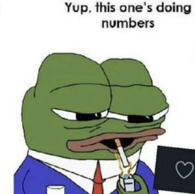

Caption: 
The image shows a cartoon frog wearing a blue blazer, white shirt, and red tie, holding a cigarette in one hand and a black object in the other. At the top of the image, the words "yup, this one's doing numbers" are written.



In [11]:
# Example usage:
image_path = "doing_numbers.png"
display_image(image_path)
caption = get_florence_caption(image_path)
print('Caption:', caption)